# Audi used cars data visualization with python

#### OBJECTIVES

- Data Visualization using NumPy and Pandas
- Finding number of unique values present in the DataFrame
- Write functions in Python
- Data Visualization by using Bar plot
- changing the context of a plot
- creating subplots
- Histogramic Analysis for Audi Used Cars Based on Year, Price, Mileage and mpg
- Probabilistic Analysis of Audi used car for Price and Mileage
- Distributive analysis of Audi used car Price for Mileage
- Distributive analysis of Audi used car price for fuelType
- Boxplot for Audi used cars price and mileage analysis based on fuelType and transmission respectively
- Data Filtering
- Data aggregation for counting average selling price and total selling price respect to model column
- Data Visualization for calculating average selling price and total selling price in terms of top five selling cars' model
- Data aggregation for counting average selling price and total selling price respect to transmission column
- Data Visualization for calculating average selling price and total selling price in terms of transmission column
- Data aggregation for counting average selling price and total selling price respect to fuelType column
- Data Visualization for calculating average selling price and total selling price in terms of fuelType column
- Pivot table for calculating average and total selling prices of cars in terms of model column
- Pivot table for calculating average and total selling prices of cars in terms of transmission column
- Pivot table for calculating average and total selling prices of cars in terms of fuelType column

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

In [13]:
df = pd.read_csv("audi.csv")

display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


In [3]:
#df = pd.read_csv("audi.csv")

#display(df)

In [6]:
fuelType_count = df['fuelType'].value_counts(normalize=True)
#display(fuelType_count)
#print(fuelType_count.index)

fuelType_count = pd.DataFrame(fuelType_count)
#display(fuelType_count)

fuelType_count = fuelType_count.reset_index()
#display(fuelType_count)

fuelType_count = fuelType_count.rename(columns={'index':'fuelType', 'fuelType':'% of cars'})
fuelType_count['% of cars'] = fuelType_count['% of cars']*100
#display(fuelType_count)

#fuelType_count['% of cars'] = np.round(fuelType_count['% of cars'], 2)
#display(fuelType_count)

fuelType_count = fuelType_count.round(2)
display(fuelType_count)

,fuelType,% of cars
0,Diesel,52.28
1,Petrol,47.46
2,Hybrid,0.26


## Unique values presentation in the 'transmission' column

In [8]:
transmission_count = df['transmission'].value_counts(normalize=True)
#display(transmission_count)
#print(transmission_count.index)

transmission_count = pd.DataFrame(transmission_count)
#display(transmission_count)

transmission_count = transmission_count.reset_index()
#display(transmission_count)

transmission_count = transmission_count.rename(columns={'index':'transmission', 'transmission':'% of cars'})
transmission_count['% of cars'] = transmission_count['% of cars']*100
#display(transmission_count)

#transmission_count['% of cars'] = np.round(transmission_count['% of cars'], 2)
#display(transmission_count)

transmission_count = transmission_count.round(2)
display(transmission_count)

,transmission,% of cars
0,Manual,40.95
1,Semi-Auto,33.66
2,Automatic,25.38


In [ ]:
model_count = df['model'].value_counts(normalize=True)
#display(model_count)
#print(model_count.index)

model_count = pd.DataFrame(model_count)
#display(model_count)

model_count = model_count.reset_index()
#display(model_count)

model_count = model_count.rename(columns={'index':'model', 'model':'% of cars'})
model_count['% of cars'] = model_count['% of cars']*100
#display(model_count)

#model_count['% of cars'] = np.round(model_count['% of cars'], 2)
#display(model_count)

model_count = model_count.round(2)
display(model_count)

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
sns.barplot(x='model', y='% of cars', data=model_count, color='r', alpha=0.75)
plt.yticks(np.arange(0,21,5))
plt.title("Number of cars present for each model")
plt.xlabel("Audi Cars Model")
plt.ylabel("Number of cars")
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.barplot(x='transmission', y='% of cars', data=transmission_count, color='g', alpha=0.75)
plt.yticks(np.arange(0,61,10))
plt.title("Number of cars present for each transmission")
plt.xlabel("Type of transmission")
plt.ylabel("Number of cars")

plt.subplot(1,3,3)
sns.barplot(x='fuelType', y='% of cars', data=fuelType_count, color='blue', alpha=0.75)
plt.yticks(np.arange(0,61,10))
plt.title("Number of cars present for each fuelType")
plt.xlabel("Type of fuel")
plt.ylabel("Number of cars")

plt.suptitle("Categorical variables in the Audi used cars dataset")
plt.tight_layout()
plt.show()

## Number of observations for unique value in a column of a DataFrame by using function in the form of Barplot

In [56]:
def unique_percent_count(data, column):
    
    df_count = data[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

In [57]:
model_fuelType = unique_percent_count(df, 'fuelType')
display(model_fuelType)
model_transmission = unique_percent_count(df, 'transmission')
display(model_transmission)
model_count = unique_percent_count(df, 'model')
display(model_count)
year_count = unique_percent_count(df, 'year')
display(year_count)
year_count = year_count.sort_values(by='year')

,fuelType,No_of_cars,% of cars
0,Diesel,5577,52.28
1,Petrol,5063,47.46
2,Hybrid,28,0.26


,transmission,No_of_cars,% of cars
0,Manual,4369,40.95
1,Semi-Auto,3591,33.66
2,Automatic,2708,25.38


,model,No_of_cars,% of cars
0,A3,1929,18.08
1,Q3,1417,13.28
2,A4,1381,12.95
3,A1,1347,12.63
4,A5,882,8.27
5,Q5,877,8.22
6,Q2,822,7.71
7,A6,748,7.01
8,Q7,397,3.72
9,TT,336,3.15


,year,No_of_cars,% of cars
0,2019,3197,29.97
1,2016,1964,18.41
2,2017,1935,18.14
3,2015,999,9.36
4,2018,864,8.10
5,2020,716,6.71
6,2014,447,4.19
7,2013,291,2.73
8,2012,85,0.80
9,2011,47,0.44


In [15]:
def barplot(data, column_x, color, rotation, yticks):
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    plt.title("Number of cars present for each " + column_x)
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    plt.xticks(rotation=rotation)
    plt.yticks(yticks)

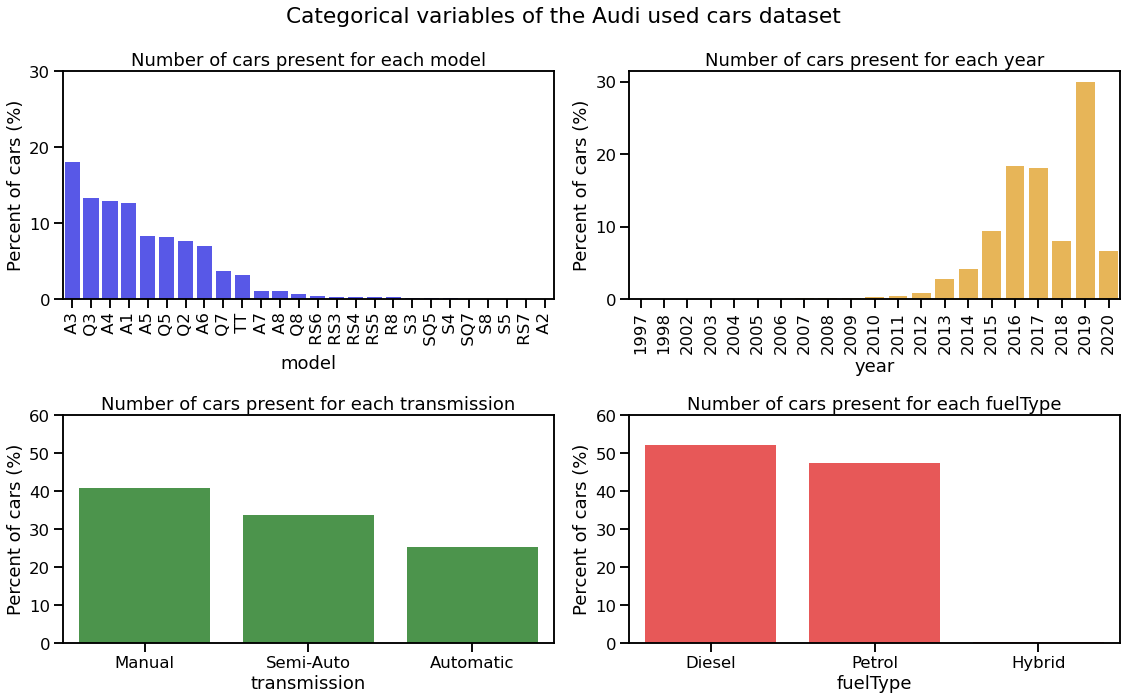

In [16]:
sns.set_context('talk')

plt.figure(figsize=(16,10))
plt.subplot(2,2,1)

barplot(model_count, 'model', 'blue', 90, np.arange(0,31,10))
plt.subplot(2,2,2)

barplot(year_count, 'year', 'orange', 90, np.arange(0,31,10))
plt.subplot(2,2,3)

barplot(transmission_count, 'transmission', 'green', 0, np.arange(0,61,10))
plt.subplot(2,2,4)

barplot(fuelType_count, 'fuelType', 'red', 0, np.arange(0,61,10))

plt.suptitle("Categorical variables of the Audi used cars dataset")

plt.tight_layout()
plt.show()

- The above **first figure of model based** Audi used cars analysis indicate that **Positive skewed distribution** and we can define that 18% cars are A3 model, 14% cars are Q3 model, 13% cars are A4 model, 12% cars are A1 model.

- The second figure shows the random distribution and approximately 29% cars released in the year 2019

- The third figure shows that **about 40% cars are manual, 34% cars are semiauto and 25% cars are automatic**. Here, Maximum number of cars are manual and minimum number of cars are automatic.

- The last figure shows that about 52% cars fueltype is diesel and 48% cars fueltype is petrol.

# Mileage Vs Price analysis for Audi used cars dataset by Scatter Plot

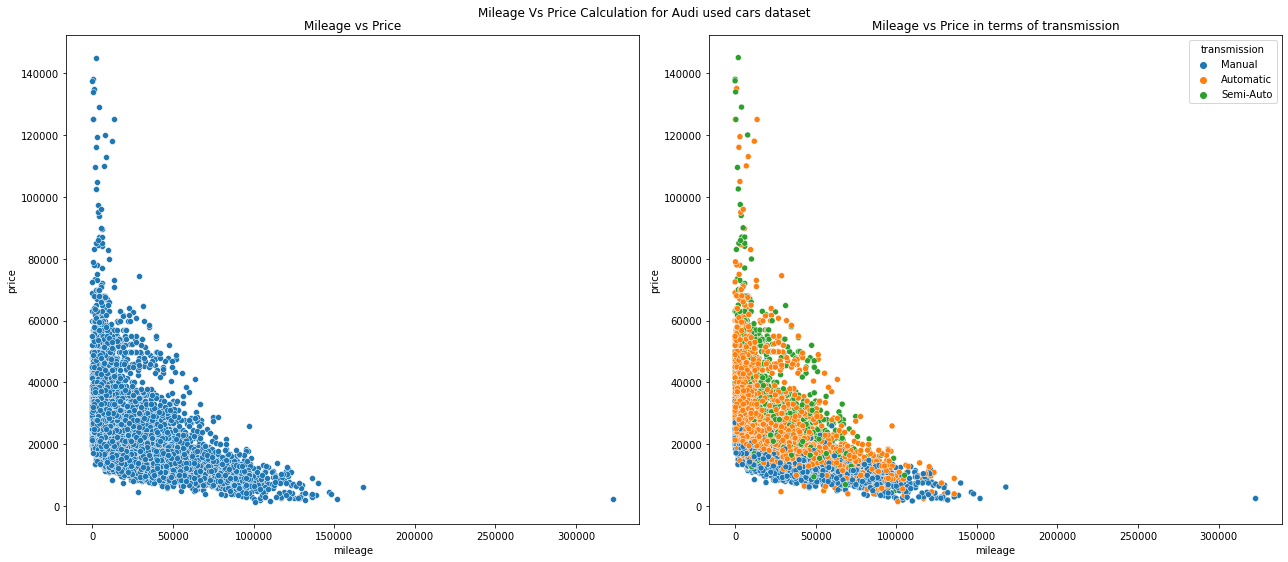

In [13]:
plt.figure(figsize=(18,15))

plt.subplot(2,2,1)
sns.scatterplot(x='mileage', y='price', data=df)
plt.title("Mileage vs Price")

plt.subplot(2,2,2)
sns.scatterplot(x='mileage', y='price', data=df, hue='transmission')
plt.title("Mileage vs Price in terms of transmission")

plt.suptitle("Mileage Vs Price Calculation for Audi used cars dataset")
plt.tight_layout()
plt.show()

- From the above **first mileage vs price** figure we can investigate that, the price is decreasing when the mileage is increasing. Also we can demonstarte that, from **second mileage vs price** figure most of manual cars price are below 20000 and most of the automatic cars price in between **20000 to 60000 USD**. Most of the semiauto cars price are sustaining in between **30000 to 90000 USD** 

# Mileage Vs Price Calculation by showing trend line

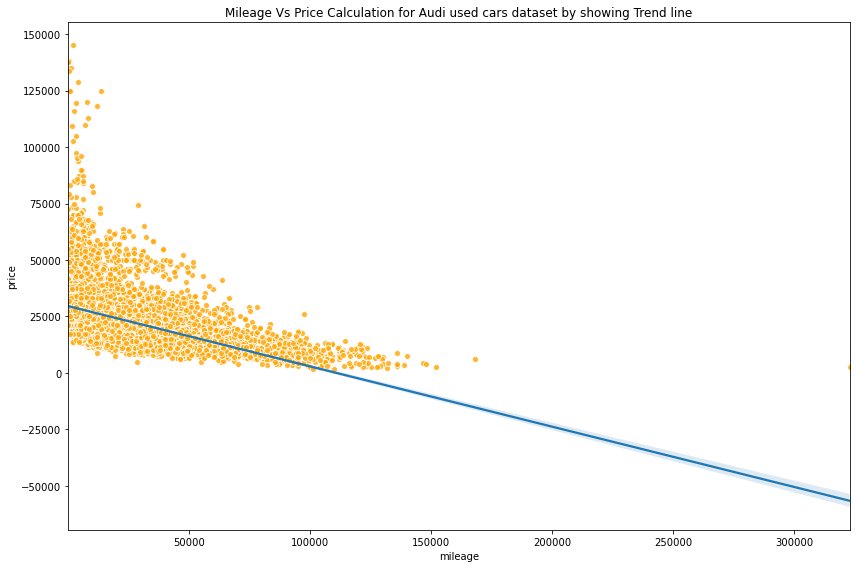

In [15]:
plt.figure(figsize=(12,8))
sns.regplot(x='mileage', y='price', data=df, scatter_kws={'color':'orange', 'edgecolor': 'white'})

plt.title("Mileage Vs Price Calculation for Audi used cars dataset by showing Trend line")
plt.tight_layout()
plt.show()

- The above figure shows that, the car price is changing with the mileage changing. Most of cars price above the trend line is decreasing when the mileage is increasing. For example, when the mileage is **100000** the price is **10000 USD** and when the mileage is **150000** the price is almost **20000 USD**

# Pair plot for Audi used car dataset in terms transmission

In [4]:
#plt.figure(figsize=(16,10))
#sns.pairplot(df, corner= True, hue='transmission')
#plt.show()

In [21]:
df.describe()

,year,price,mileage,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,188.300000,6.300000


# Histogramic Analysis for Audi Used Cars Based on Year, Price, Mileage and mpg

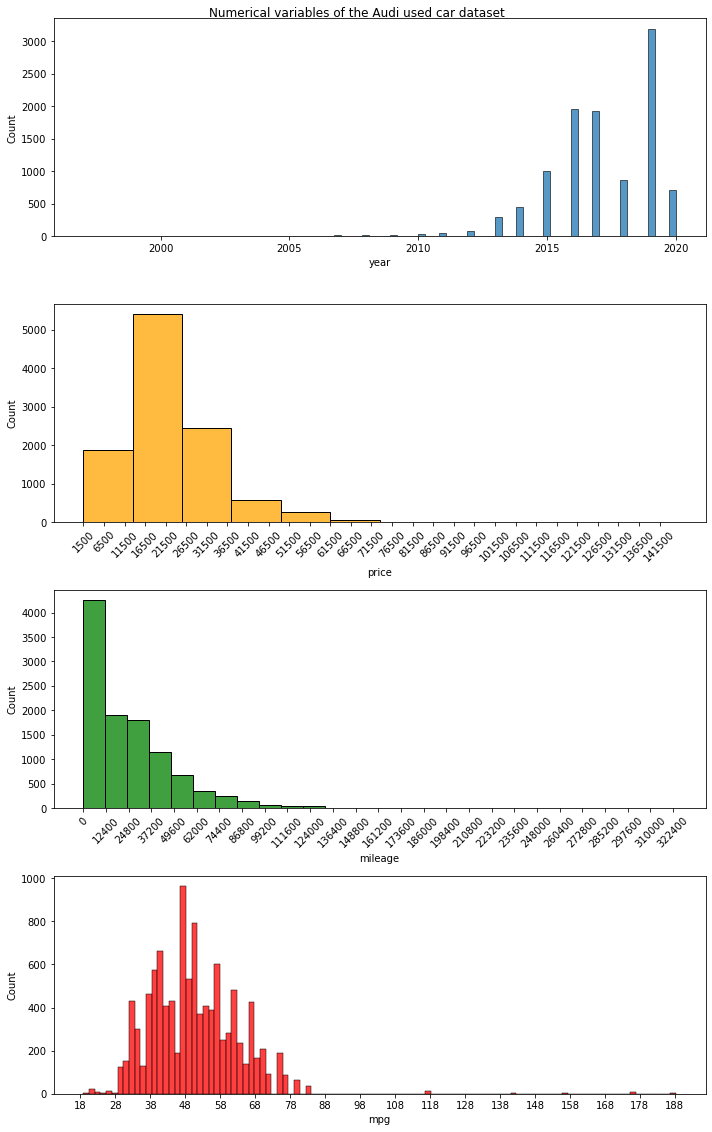

In [21]:
plt.figure(figsize=(10,16))
plt.subplot(4,1,1)
sns.histplot(data=df, x= 'year')


plt.subplot(4,1,2)
sns.histplot(data=df, x= 'price', binwidth=12000, color='orange')
plt.xticks(np.arange(1500,145000,5000))
plt.xticks(rotation=45)

plt.subplot(4,1,3)
sns.histplot(data=df, x= 'mileage', binwidth=12000, color='green')
plt.xticks(np.arange(0, 325000,12400))
plt.xticks(rotation=45)

plt.subplot(4,1,4)
sns.histplot(data=df, x= 'mpg', color='red')
plt.xticks(np.arange(18,190,10))


plt.suptitle("Numerical variables of the Audi used car dataset")
plt.tight_layout()
plt.show()

- From the above figure the **year based Hisgram** shows the **comb** distribution. Here, maximum number of cars for example, **20000 to 30000** are realeased in between the year **2015 to 2020.

- From the above figure the **Price based Hisgram** shows the negative skewed distribution. Also the histogram shows that, above 5000 cars price sustaining in between **14000 to 24000 USD**

- From the above figure the **mileage based Hisgram** shows the right skewed distribution. When the mileage for Audi used cars is **0 to 12400** then the price is **above 4000 USD** but when the mileage is **12400 to 24800** then the car price goes down rapidly and sustaining in between **1500 to 2000 USD**. Thats mean when the mileage goes up then the proce goes down and vice versa.

- From the above figure the **mpg based Hisgram** shows the **random distribution** and maximum cars are in between the mpg **38 to 58**

# Probabilistic Analysis of Audi used car  for Price and Mileage

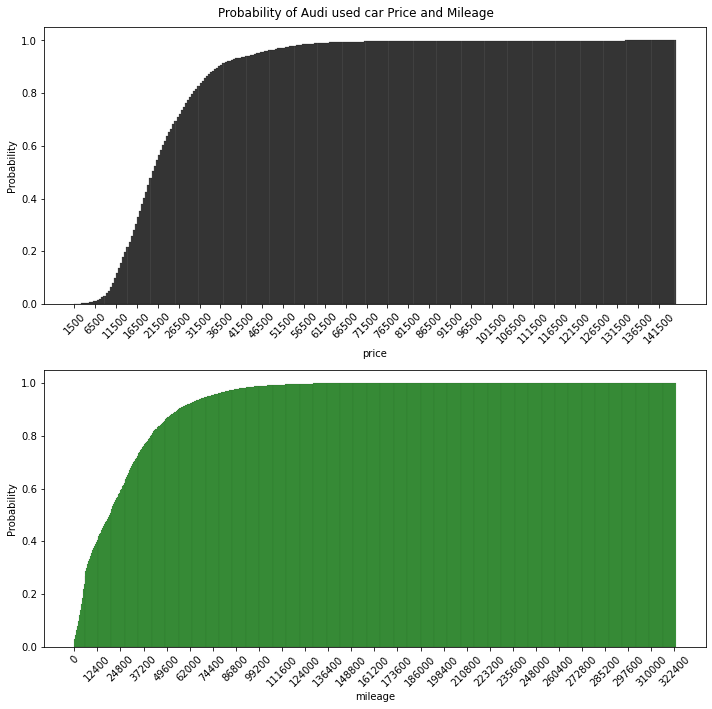

In [46]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.histplot(data=df, x= 'price', binwidth=500, color='black', cumulative=True, stat='probability')
plt.xticks(np.arange(1500,145000,5000))
plt.xticks(rotation=45)

plt.subplot(2,1,2)
sns.histplot(data=df, x= 'mileage', binwidth=500, color='g', cumulative=True, stat='probability')
plt.xticks(np.arange(0,325000,12400))
plt.xticks(rotation=45)

plt.suptitle("Probability of Audi used car Price and Mileage")
plt.tight_layout()
plt.show()

- The above first figure shows the **Probabilistic Empirical Cumulative Distribution Function(ECDF)** for Audi used car price. The probability for sustaining cars for less than or equal 14000 USD is 20% or o.2. Also, the probability for sustaining cars for less than or equal 21500 USD is 45% or 0.45

- The above second figure shows the **Probabilistic Empirical Cumulative Distribution Function(ECDF)** for Audi used car mileage. The probability to convey car for less than or equal mileage 12400 is 30% or 0.3. Moreover,the probability to convey car for less than or equal mileage 24800 is 50% or 0.5 

# Distributive analysis of Audi used car for Price and Mileage

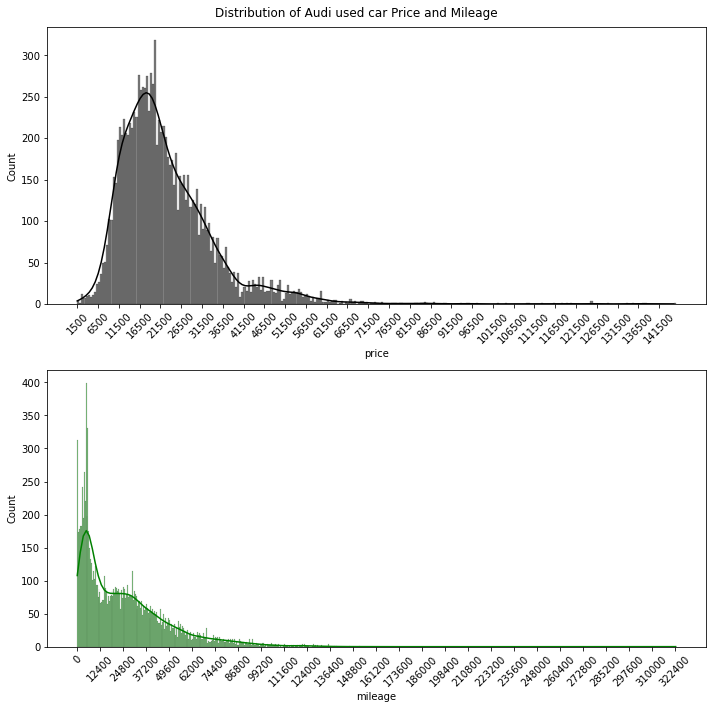

In [43]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.histplot(data=df, x= 'price', binwidth=500, color='black', kde=True)
plt.xticks(np.arange(1500,145000,5000))
plt.xticks(rotation=45)

plt.subplot(2,1,2)
sns.histplot(data=df, x= 'mileage', binwidth=500, color='green', kde=True)
plt.xticks(np.arange(0,325000,12400))
plt.xticks(rotation=45)

plt.suptitle("Distribution of Audi used car Price and Mileage")
plt.tight_layout()
plt.show()

- The **price based** Audi used cars distribution shows the **Positive skewed distribution**. Maximum number of cars are in price range of **16000 to 21000 USD**.

- The **mileage based** Audi used cars distribution shows the **Negative skewed distribution**. When the mileage range is 12400 to 24800 then the numbers of cars are in between 50 to 100.

# Distributive analysis of Audi used car for price for fuelType

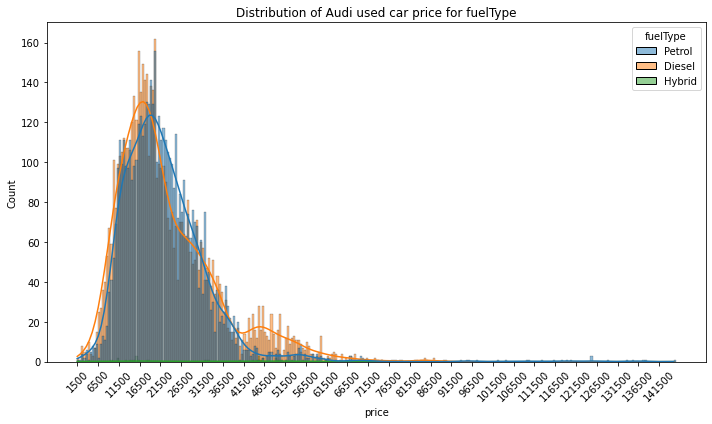

In [45]:
plt.figure(figsize=(10,6))

sns.histplot(data=df, x= 'price', binwidth=500, color='black', kde=True, hue='fuelType')
plt.xticks(np.arange(1500,145000,5000))
plt.xticks(rotation=45)

plt.title("Distribution of Audi used car price for fuelType")
plt.tight_layout()
plt.show()

- The above figure shows the **Positive or Right skewed distribution**. Here, the Audi used car prices are distributed in terms of fueltype. Maximum number of cars prices in between **9000 to 39000 USD** and their fueltype is petrol. Minimum number of cars fueltype is hybrid. 

# Boxplot for Audi used cars price and mileage analysis based on fuelType and transmission respectively

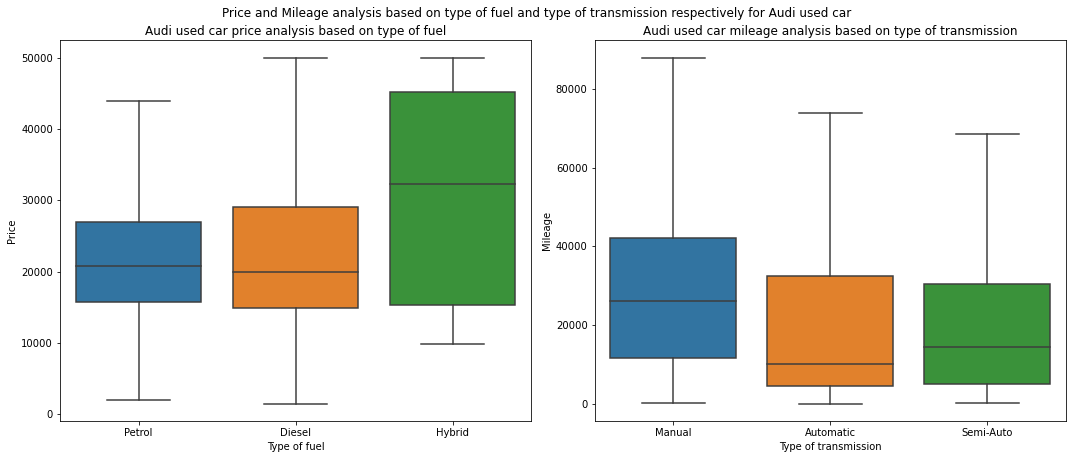

In [78]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.boxplot(x='fuelType', y='price', data= df, showfliers= False)
plt.xlabel("Type of fuel")
plt.ylabel("Price")
#plt.yticks(np.arange(1000,145000,5000))
plt.title("Audi used car price analysis based on type of fuel")

plt.subplot(2,2,2)
sns.boxplot(x='transmission', y='mileage', data= df, showfliers= False)
plt.xlabel("Type of transmission")
plt.ylabel("Mileage")
plt.title("Audi used car mileage analysis based on type of transmission")

plt.suptitle("Price and Mileage analysis based on type of fuel and type of transmission respectively for Audi used car")
plt.tight_layout()
plt.show()

#### From Type of fuel vs Price boxplot the findings are as follows,
**For Petrol** 
- The cars minimum price is 2000 USD and maximum price is around 45000 USD
- The median price is around 22000 USD
- The price range is 43000 USD
- 25% and 75% price are 16000 and 26000 USD respectively.
- IQR or inter quartile range is about 10000

**Similarly For Diesel**
- The cars minimum price is around 1800 USD and maximum price is around 50000 USD
- The median price is around 20000 USD
- The price range is 48200 USD
- 25% and 75% price are 15000 and 28000 USD respectively.
- IQR or inter quartile range is about 13000

#### From Type of transmission vs Mileage boxplot the findings are as follows,
**For Manual**
- The cars minimum mileage is around 2000 and maximum mileage is around 95000
- The median mileage is around 28000
- The mileage range is 93000
- 25 percentile and 75 percentile mileage are about 16000 and 42000 respectively.
- IQR or inter quartile range is about 26000

**Similarly For Automatic**
- The cars minimum mileage is around 1800 and maximum mileage is around 76000
- The median mileage is about 15000
- The mileage range is around 74200
- 25 percentile and 75 percentile mileage are about 14500 and 31000 respectively.
- IQR or inter quartile range is about 16500

#### Number of unique values present in the 'Model' column

In [8]:
print(df['model'].unique())

[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']


#### Data Filtering

In [28]:
df_a7 = df[df['model'] == ' A7']

display(df_a7)
print(df_a7.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
116,A7,2014,19500,Automatic,55774,Diesel,44.8,3.0
203,A7,2019,39985,Automatic,5201,Diesel,38.7,3.0
234,A7,2019,43885,Semi-Auto,10,Diesel,38.2,3.0
350,A7,2019,32985,Automatic,1285,Diesel,39.2,3.0
476,A7,2019,41995,Semi-Auto,933,Diesel,45.6,2.0
...,...,...,...,...,...,...,...,...
10341,A7,2020,45000,Automatic,1200,Diesel,38.2,3.0
10414,A7,2019,48790,Automatic,4700,Diesel,35.8,3.0
10441,A7,2016,22990,Semi-Auto,26000,Diesel,52.3,3.0
10585,A7,2016,43000,Automatic,55500,Petrol,29.7,4.0


(122, 8)


#### Average price of Audi 'A7' model cars

In [30]:
df_a7['price'].sum()/122

28865.516393442624

#### Data aggregation for counting average selling price and total selling price respect to model column

In [14]:
df_agg = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg)

,count,mean,sum
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015
A6,748,22695.385027,16976148
A7,122,28865.516393,3521593
A8,118,34981.847458,4127858
Q2,822,22516.975669,18508954


- We can see from the above groupby statistics for model column that the total selling automobiles for the A3 variants are 1929. 17408.522032 USD and 33581039 USD are the average and total selling prices, respectively.
- We can see from the above groupby statistics for model column that the total selling automobiles for the A4 variants are 1381. 20255.450398 USD and 27972777 USD are the average and total selling prices, respectively.Also, the other model cars' average selling price and total selling prices are similar to the groupby above.

#### Data Visualization for calculating average selling price and total selling price in terms of top five selling cars' model

In [15]:
# sorting the dataframe depends on Count column
df_agg = df_agg.sort_values(by='count', ascending=False)

# new column percentage of the cars in each model
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

# converting the sum column in millions
df_agg['sum'] = df_agg['sum']/1000000

# rounding
df_agg = df_agg.round(2)

# removing the count column
df_agg = df_agg.drop('count', axis=1)

display(df_agg.head())

,mean,sum,percent_of_cars
model,,,
A3,17408.52,33.58,18.08
Q3,22999.26,32.59,13.28
A4,20255.45,27.97,12.95
A1,14327.75,19.30,12.63
A5,23577.11,20.80,8.27


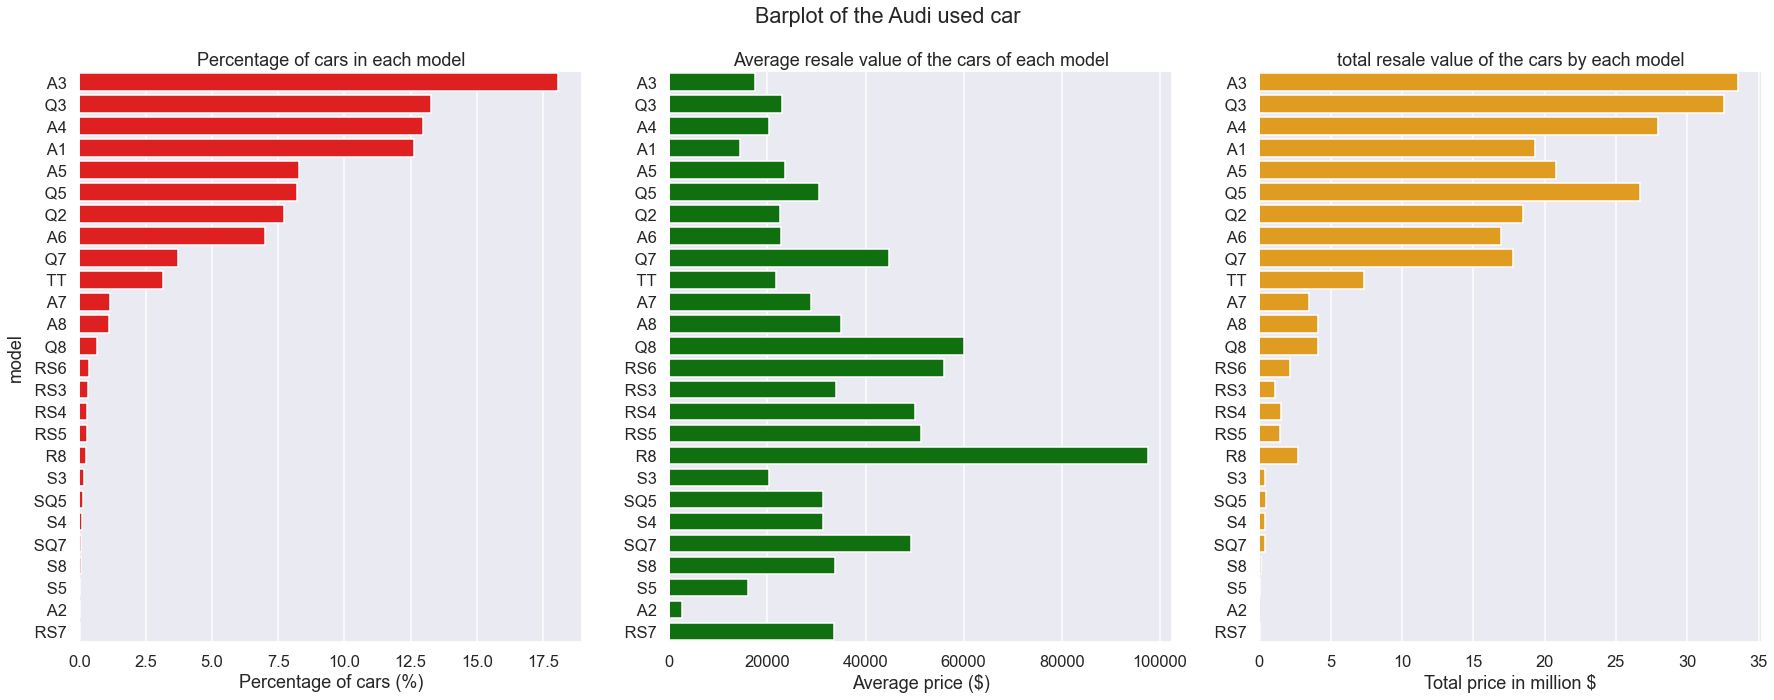

In [16]:
plt.figure(figsize=(25,10))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg.index, data=df_agg, orient='h', color='red')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg.index, data=df_agg, orient='h', color='green')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg.index, data=df_agg, orient='h', color='orange')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Audi used car")
plt.tight_layout()
plt.show()

- Top five selling car models are A3(18%), Q3(13%), A4(12.8%), A1(12.5%), A5(8%)
- Top five average selling price car models are R8(95000 USD), Q8(60000 USD), RS6(58000 USD), RS5(50000 USD), SQ7(50000 USD)
- Top five total selling price car models are A3(30 million USD), Q3(33 Million USD), A4(28 million USD), Q5(26 million USD), A5(22 million USD)

#### Data aggregation for counting average selling price and total selling price respect to transmission column

In [84]:
df_agg = df.groupby('transmission')['price'].agg(['count', 'mean', 'sum'])

display(df_agg)

,count,mean,sum
transmission,,,
Automatic,2708,28204.750000,76378463
Manual,4369,16101.033417,70345415
Semi-Auto,3591,27161.781676,97537958


- From the above groupby statistics for the transmission column that the total selling automobiles for the Automatic variants are 2708. 28204.750000 USD and 76378463 USD are the average and total selling prices, respectively.
- The above groupby statistics stated for the transmission column that the total selling automobiles for the Manual variants are 4369. 16101.033417 USD and 70345415 USD are the average and total selling prices, respectively.
- Finally, the above groupby statistics stated for the transmission column that the total selling automobiles for the Semi-Auto variants are 3591. 27161.781676 USD and 97537958 USD are the average and total selling prices, respectively.

#### Data Visualization for calculating average selling price and total selling price in terms of transmission column

In [85]:
# data frame sorting based on transmission column
df_agg = df_agg.sort_values(by='count', ascending=False)

# column percentage of the cars in each transmission
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

# convert the sum column in millions
df_agg['sum'] = df_agg['sum']/1000000

# rounding
df_agg = df_agg.round(2)

# removing the count column
df_agg = df_agg.drop('count', axis=1)

display(df_agg.head())

,mean,sum,percent_of_cars
transmission,,,
Manual,16101.03,70.35,40.95
Semi-Auto,27161.78,97.54,33.66
Automatic,28204.75,76.38,25.38


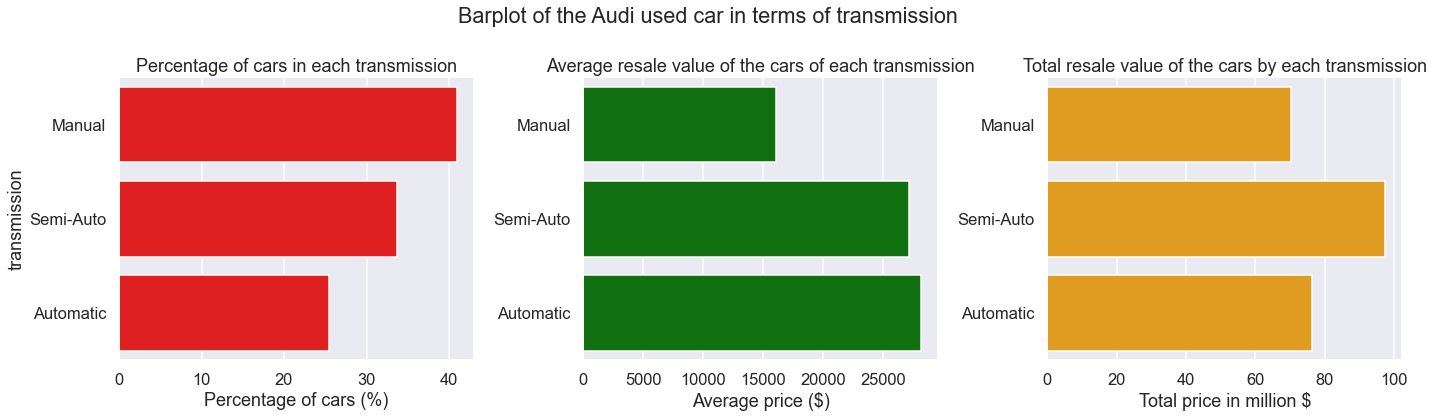

In [89]:
plt.figure(figsize=(20,6))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg.index, data=df_agg, orient='h', color='red')
plt.title("Percentage of cars in each transmission")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg.index, data=df_agg, orient='h', color='green')
plt.title("Average resale value of the cars of each transmission")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg.index, data=df_agg, orient='h', color='orange')
plt.title("Total resale value of the cars by each transmission")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Audi used car in terms of transmission")
plt.tight_layout()
plt.show()

- From the above data visualization we can discolse that 42% cars' are manual, 34% cars' are semi-auto, 25% cars' are automatic
- Average selling price for manual, semi-auto, automatic cars' are 17000 USD, 30000 USD, 34000 USD respectively
- Total selling price for manual, semi-auto, automatic cars' are 70 million USD, 95 million USD, 78 million USD respectively

#### Data aggregation for counting average selling price and total selling price respect to fuelType column

In [90]:
df_agg = df.groupby('fuelType')['price'].agg(['count', 'mean', 'sum'])

display(df_agg)

,count,mean,sum
fuelType,,,
Diesel,5577,23237.516227,129595628
Hybrid,28,30191.750000,845369
Petrol,5063,22480.908355,113820839


- We can see from the above groupby statistics for fueltype column that the total selling automobiles for the Diesel variants are 5577. 23237.516227 USD and 129595628 USD are the average and total selling prices, respectively.
- Similarly, We can see from the above groupby statistics for the fueltype column that the total selling automobiles for the Hybrid variants are 28. 30191.750000 USD and 845369 USD are the average and total selling prices, respectively.
- Moreover, from the above groupby statistics for the fueltype column that the total selling automobiles for the Petrol variants are 5063. 22480.908355 USD and 113820839 USD are the average and total selling prices, respectively.

#### Data Visualization for calculating average selling price and total selling price in terms of fuelType column

In [91]:
# dataframe sorting
df_agg = df_agg.sort_values(by='count', ascending=False)

# column percentage of the cars in each fuelType
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

# convert the sum column in millions
df_agg['sum'] = df_agg['sum']/1000000

# rounding
df_agg = df_agg.round(2)

# removing 
df_agg = df_agg.drop('count', axis=1)

display(df_agg.head())

,mean,sum,percent_of_cars
fuelType,,,
Diesel,23237.52,129.60,52.28
Petrol,22480.91,113.82,47.46
Hybrid,30191.75,0.85,0.26


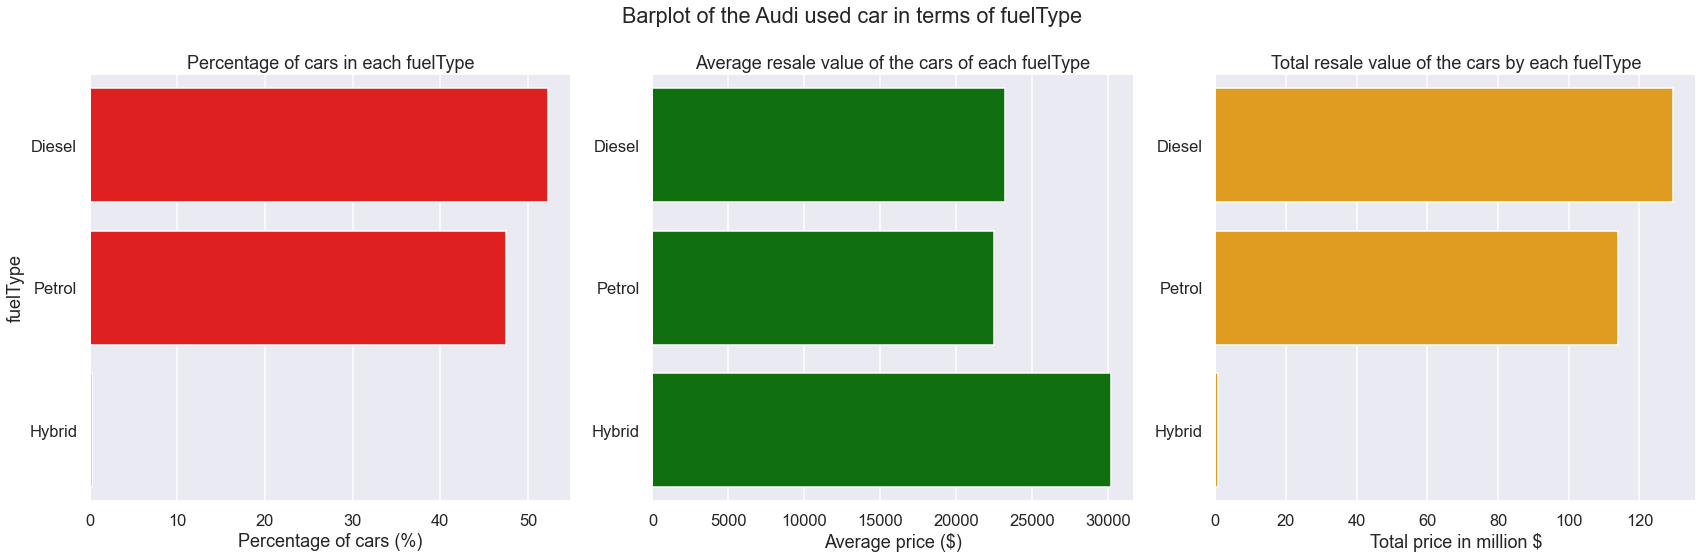

In [94]:
plt.figure(figsize=(24,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg.index, data=df_agg, orient='h', color='red')
plt.title("Percentage of cars in each fuelType")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg.index, data=df_agg, orient='h', color='green')
plt.title("Average resale value of the cars of each fuelType")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg.index, data=df_agg, orient='h', color='orange')
plt.title("Total resale value of the cars by each fuelType")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Audi used car in terms of fuelType")
plt.tight_layout()
plt.show()

- The above data visualization stated that 52% cars' are Diesel engine, 48% cars' are petrol engine and Hybrid cars' are nil
- Average selling price for Diesel engine cars' are 26000 USD, Petrol engine cars' are 24000 USD and Hybrid cars' are 30000 USD
- Total selling price for Diesel engine cars' are 130 million USD, Petrol engine cars' are 118 million USD and Hybrid cars' are nil

#### Pivot table for calculating average and total selling prices of cars in terms of model column

In [83]:
df_pivot = pd.pivot_table(df, index='model', values='price', aggfunc=['count', 'mean', 'sum']).head(5)
display(df_pivot)

,count,mean,sum
,price,price,price
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015


- There are 1347 cars with the A1 model, according to the pivot table above. The average selling price of the A1 model cars was 14327.750557 USD, with a total selling price of 19299480 USD.
- There are 1929 cars with the A3 model, according to the pivot table above. The average selling price of the A3 model cars was 17408.522032 USD, with a total selling price of 33581039 USD.
- There are 1381 cars with the A4 model, according to the pivot table above. The average selling price of the A4 model cars was 20255.450398 USD, with a total selling price of 27972777 USD. Furthermore, the others model cars average selling price and total selling prices are similar with the pivot table above.

#### Pivot table for calculating average and total selling prices of cars in terms of transmission column

In [47]:
df_pivot = pd.pivot_table(df, index='transmission', values='price', aggfunc=['count', 'mean', 'sum'])
display(df_pivot)

,count,mean,sum
,price,price,price
transmission,,,
Automatic,2708,28204.750000,76378463
Manual,4369,16101.033417,70345415
Semi-Auto,3591,27161.781676,97537958


- According to the pivot table above, there are a total of 2708 cars with automatic transmissions. Automatic cars had an average selling price of 28204.750000 USD and a total selling price of 76378463 USD, respectively.
-According to the pivot table above, there are a total of 4369 cars with manual transmissions. Manual cars had an average selling price of 16101.033417 USD and a total selling price of 70345415 USD, respectively.
-According to the pivot table above, there are a total of 3591 cars with semi-auto transmissions. Semi-auto cars had an average selling price of 27161.781676 USD and a total selling price of 97537958 USD, respectively.

#### Pivot table for calculating average and total selling prices of cars in terms of fuelType column

In [48]:
df_pivot = pd.pivot_table(df, index='fuelType', values='price', aggfunc=['count', 'mean', 'sum'])
display(df_pivot)

,count,mean,sum
,price,price,price
fuelType,,,
Diesel,5577,23237.516227,129595628
Hybrid,28,30191.750000,845369
Petrol,5063,22480.908355,113820839


- According to the pivot table above, the total number of cars with a diesel fuel type is 5577. The average selling price and total selling price for diesel fuel are 23237.51627 and 129595628 USD, respectively.
- Also, according to the pivot table above, the total number of cars with a hybrid fuel type is 28. The average selling price and total selling price for hybrid fuel are 30191.750000 and 845369 USD, respectively.
-According to the pivot table above, the total number of cars with a petrol fuel type is 5063. The average selling price and total selling price for petrol fuel are 22480.908355 and 113820839 USD, respectively.